<a href="https://colab.research.google.com/github/fridymandita/KCBV/blob/main/Compare_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files
file = files.upload()

Saving butterfly_noisy.jpg to butterfly_noisy.jpg


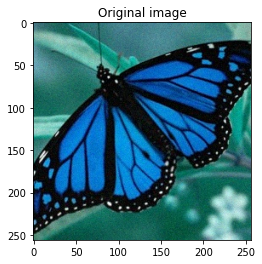

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("butterfly_noisy.jpg")
plt.imshow(img)
plt.title("Original image")
plt.show()

In [24]:
def unnormalized_gaussian(x, sigma):
    # TODO: helper function for calculating exponent of (-x) divided by two sigma (one line)
    return None


def distance(x, y, i, j):
    # TODO: get L2 distance function between two points - helper function for calculating "g_s" (one line)
    return None


In [25]:
def bilateral_one_pixel(source, x, y, d, sigma_r, sigma_s):
    # === init vars
    filtered_pix = 0
    Wp = 0

    # TODO:
    # 1. run on all neighboors (~3 lines)
    # 2. if neighboor out of matrix indices - don't count him in your computation (~2 lines)
    # 3. find filtered_pix (~6 lines)

    # make result uint8
    filtered_pix = np.clip(filtered_pix, 0, 255).astype(np.uint8)
    return filtered_pix


In [26]:
def bilateral_filter(source, d, sigma_r, sigma_s):

    # build empty filtered_image
    filtered_image = np.zeros(source.shape, np.uint8)
    # make input float
    source = source.astype(float)
    # d must be odd!
    assert d % 2 == 1, "d input must be odd"

    # TODO: run on all pixels with bilateral_one_pixel(...) (~4 lines)

    return filtered_image

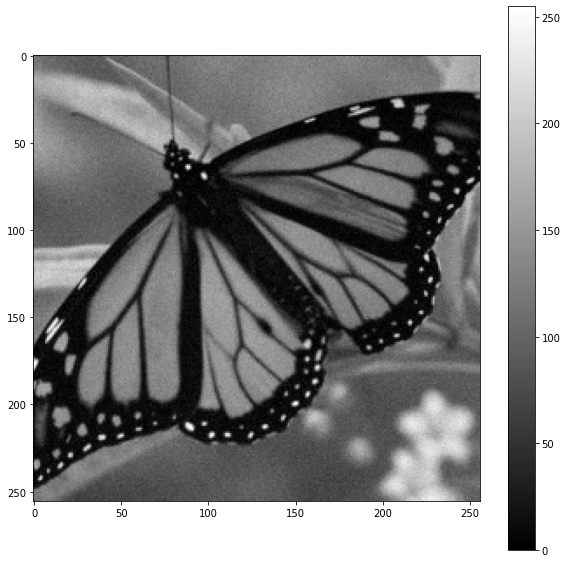

In [27]:
# upload noisy image
src = cv2.imread("butterfly_noisy.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.imshow(src, cmap="gray", vmin=0, vmax=255)
plt.colorbar()
plt.show()

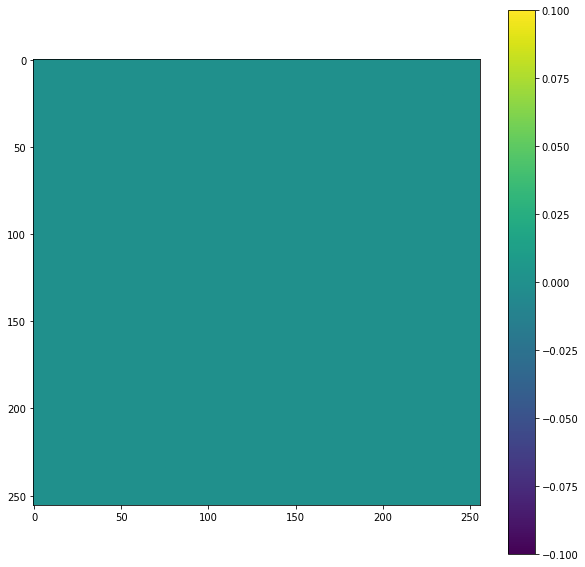

In [28]:
# run bilateral_filter(...)
d = 5  # edge size of neighborhood perimeter
sigma_r = 12  # sigma range
sigma_s = 16  # sigma spatial

filtered_image = bilateral_filter(src, d, sigma_r, sigma_s)

plt.figure(figsize=(10, 10))
plt.imshow(filtered_image)
plt.colorbar()
plt.show()

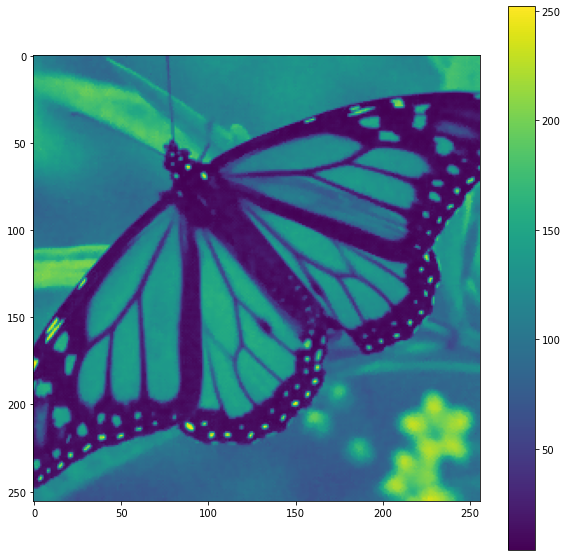

In [29]:
# compare to opencv
filtered_image_OpenCV = cv2.bilateralFilter(src, d, sigma_r, sigma_s)

plt.figure(figsize=(10, 10))
plt.imshow(filtered_image_OpenCV)
plt.colorbar()
plt.show()

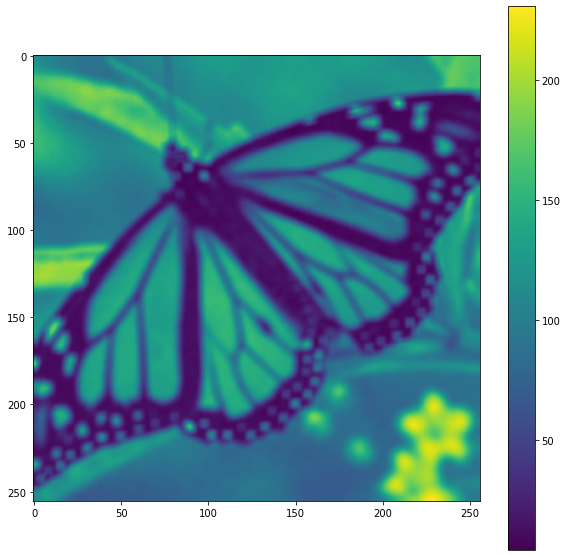

In [30]:
# compare to regular gaussian blur
blur = cv2.GaussianBlur(src, (d, d), sigma_s)
plt.figure(figsize=(10, 10))
plt.imshow(blur)
plt.colorbar()
plt.show()

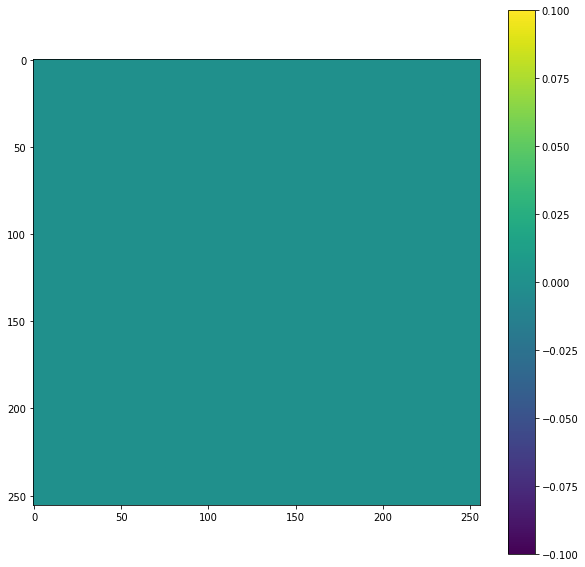

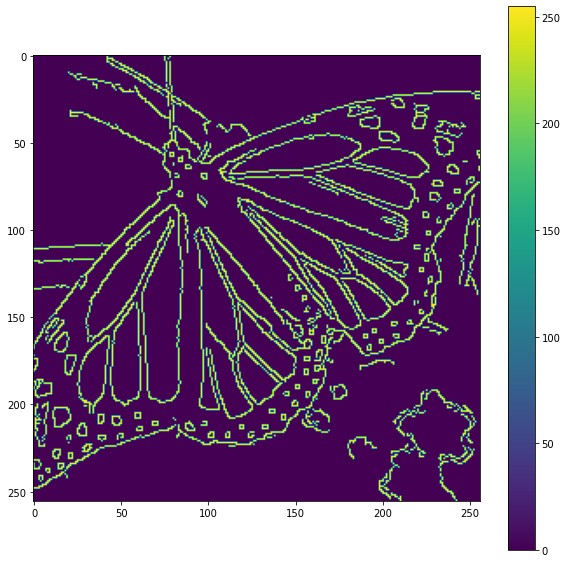

In [31]:
# compare canny results between the two images
th_low = 100
th_high = 200
res = cv2.Canny(filtered_image, th_low, th_high)
plt.figure(figsize=(10, 10))
plt.imshow(res)
plt.colorbar()
plt.show()

res = cv2.Canny(src, th_low, th_high)
plt.figure(figsize=(10, 10))
plt.imshow(res)
plt.colorbar()
plt.show()